In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import SimpleITK as sitk
from tqdm import tqdm
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
viapath = Path('/mrhome/vladyslavz/git/central-sulcus-analysis/data/via11/nobackup/segm_results/skull_stripped_images')
bvisapath = Path('/mrhome/vladyslavz/git/central-sulcus-analysis/data/brainvisa_results/nobackup')

In [3]:
[x for x in bvisapath.iterdir()]

[PosixPath('/mrhome/vladyslavz/git/central-sulcus-analysis/data/brainvisa_results/nobackup/CS1x_noSST_noSynthAugm_monaiUnet'),
 PosixPath('/mrhome/vladyslavz/git/central-sulcus-analysis/data/brainvisa_results/nobackup/CS1x_noSST_SynthAugm_monaiUnet'),
 PosixPath('/mrhome/vladyslavz/git/central-sulcus-analysis/data/brainvisa_results/nobackup/CS1x_noSST_tverskyLoss_monaBasicUnet-fullTraining'),
 PosixPath('/mrhome/vladyslavz/git/central-sulcus-analysis/data/brainvisa_results/nobackup/CS1x_bvisaSST_tverskyLoss_monaBasicUnet-fullFinetune'),
 PosixPath('/mrhome/vladyslavz/git/central-sulcus-analysis/data/brainvisa_results/nobackup/via11-monai-BasicUnet-bvisaSim-skullstripped-noMaxPool'),
 PosixPath('/mrhome/vladyslavz/git/central-sulcus-analysis/data/brainvisa_results/nobackup/CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-fullFinetune-MaxPool'),
 PosixPath('/mrhome/vladyslavz/git/central-sulcus-analysis/data/brainvisa_results/nobackup/CS1x_noSST_tverskyLoss_monaBasicUnet-frozenEncoder'),


In [4]:
aggregate_results = []
for exp in viapath.iterdir():
    res_csv = pd.read_csv(exp / 'via11_metrics.csv').set_index('caseid')
    aggr = {'exp': exp.name,
            'dataset':'via',
            'dice':f'{res_csv.loc["MEAN", "dice"]:0.4f}+-{res_csv.loc["STD", "dice"]:0.4f}',
            'hausdorff':f'{res_csv.loc["MEAN", "hausdorff_distance"]:0.4f}+-{res_csv.loc["STD", "hausdorff_distance"]:0.4f}',
            'table':res_csv}
    aggregate_results.append(aggr)
    
for exp in bvisapath.iterdir():
    try:
        res_csv = pd.read_csv(exp / 'bvisa_metrics.csv').set_index('caseid')
    except:
        print(exp)
        continue
    aggr = {'exp': exp.name,
            'dataset':'bvisa',
            'dice':f'{res_csv.loc["MEAN", "dice"]:0.4f}+-{res_csv.loc["STD", "dice"]:0.4f}',
            'hausdorff':f'{res_csv.loc["MEAN", "hausdorff_distance"]:0.4f}+-{res_csv.loc["STD", "hausdorff_distance"]:0.4f}',
            'table':res_csv
            }
    aggregate_results.append(aggr)


aggregate_results = pd.DataFrame(aggregate_results)
aggregate_results

/mrhome/vladyslavz/git/central-sulcus-analysis/data/brainvisa_results/nobackup/via11-monai-BasicUnet-bvisaSim-skullstripped-noMaxPool


,exp,dataset,dice,hausdorff,table
0,CS1x_noSST_noSynthAugm_monaiUnet,via,0.6752+-0.0267,40.8424+-30.7903,dice iou hausdorff_dist...
1,CS1x_noSST_SynthAugm_monaiUnet,via,0.6429+-0.0215,10.4648+-11.4431,dice iou hausdorff_dist...
2,CS1x_noSST_tverskyLoss_monaBasicUnet-fullTraining,via,0.6354+-0.0228,15.7147+-16.3725,dice iou hausdorff_dist...
3,CS1x_bvisaSST_tverskyLoss_monaBasicUnet-fullFi...,via,0.6399+-0.0296,28.7512+-32.2332,dice iou hausdorff_dist...
4,CS1x_via11simBVISASST_tverskyLoss_monaBasicUne...,via,0.6462+-0.0214,17.4486+-22.9309,dice iou hausdorff_dist...
5,CS1x_bvisaSST_tverskyLoss_monaBasicUnet-frozen...,via,0.5961+-0.0390,50.2468+-26.3071,dice iou hausdorff_dist...
6,CS1x_via11simBVISASST_tverskyLoss_monaBasicUne...,via,0.5565+-0.0345,35.9109+-26.1089,dice iou hausdorff_dist...
7,CS1x_via11simBVISASST_tverskyLoss_monaBasicUne...,via,0.6424+-0.0230,36.2664+-32.4124,dice iou hausdorff_dist...
8,CS1x_via11simBVISASST_tverskyLoss_monaBasicUne...,via,0.5449+-0.0384,30.6645+-16.6440,dice iou hausdorff_dist...
9,CS1x_noSST_tverskyLoss_monaBasicUnet-frozenEnc...,via,0.5992+-0.0324,25.4629+-13.2096,dice iou hausdorff_dist...


In [5]:
merged_dfs = []
for exp in aggregate_results.index:
    df = aggregate_results.loc[exp, 'table'].iloc[:-2, :].copy()
    df.loc[:, 'Experiment'] = aggregate_results.loc[exp, 'exp']
    df.loc[:, 'Dataset'] = aggregate_results.loc[exp, 'dataset']
    merged_dfs.append(df)
merged_dfs = pd.concat(merged_dfs)
merged_dfs = merged_dfs.rename(columns={'dice':'Dice', 'hausdorff_distance':'Hausdorff distance'})

In [6]:
sns.set_palette('tab10')

# Plots 1: NoSST-BVISA

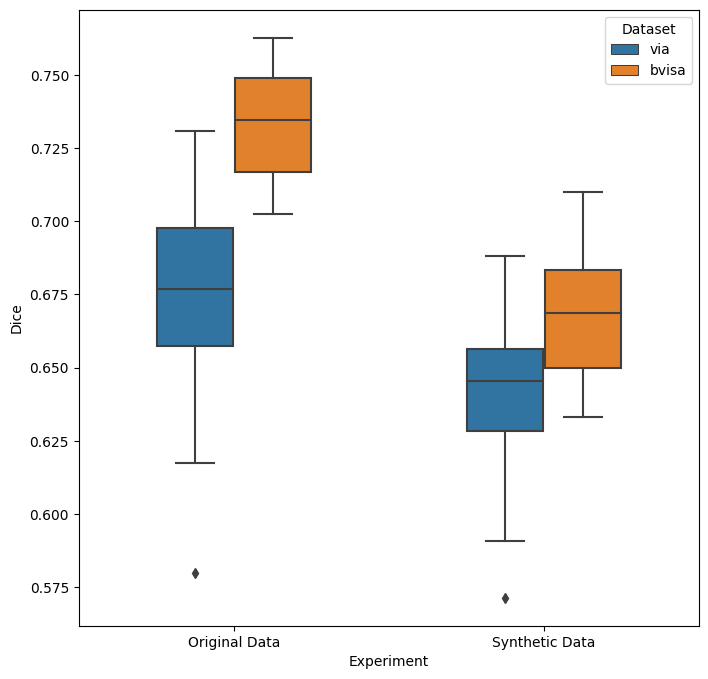

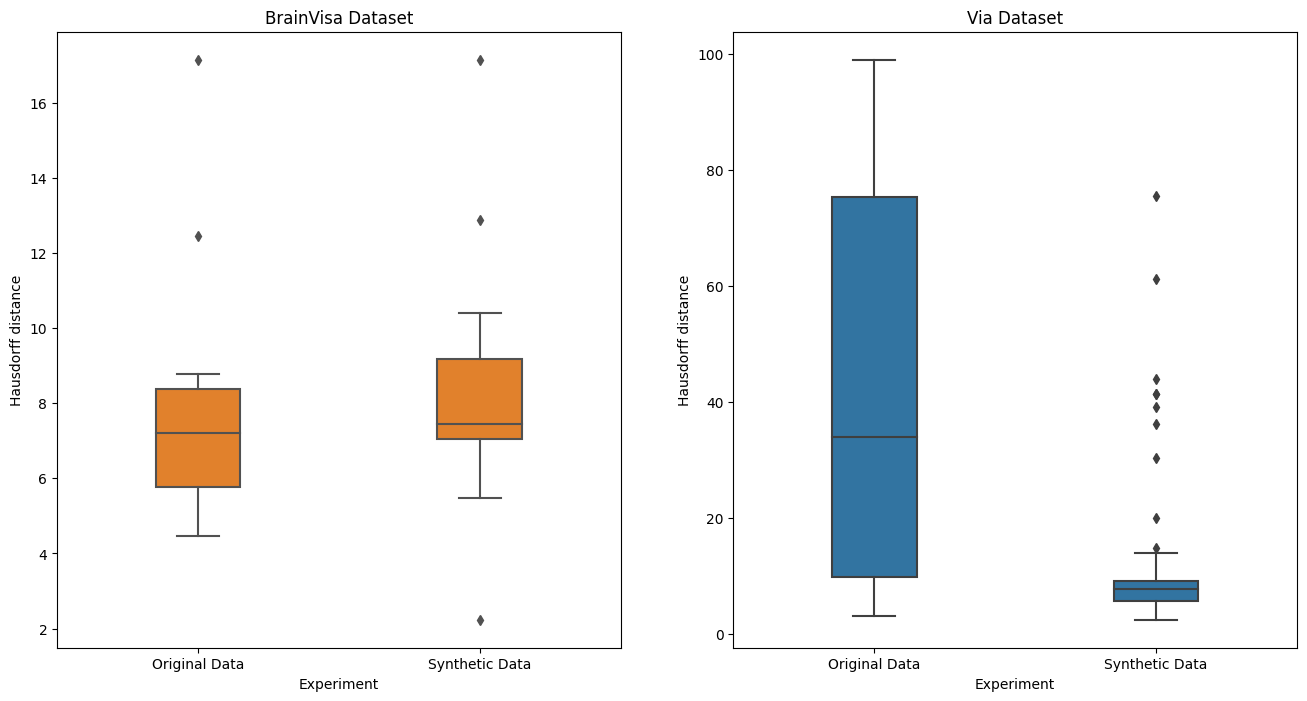

In [7]:
filter_ds = None #'via'
experiments2select = ['CS1x_noSST_noSynthAugm_monaiUnet',
                      'CS1x_noSST_SynthAugm_monaiUnet']
experiments2rename = {'CS1x_noSST_noSynthAugm_monaiUnet':'Original Data',
                      'CS1x_noSST_SynthAugm_monaiUnet':'Synthetic Data'}
if experiments2select:
    plot_df = merged_dfs[merged_dfs['Experiment'].isin(experiments2select)]
if experiments2rename:
    plot_df = plot_df.replace({'Experiment':experiments2rename})

if filter_ds:
    plot_df = plot_df[plot_df['Dataset'] == filter_ds]
else:
    plot_df = plot_df

fig = plt.figure(figsize=(8, 8))
sns.boxplot(data=plot_df, hue='Dataset', y='Dice', x='Experiment',
            width =0.5)
plt.xticks(rotation=0)
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
plot_df1 = plot_df[plot_df.Dataset == 'via']
plot_df2 = plot_df[plot_df.Dataset == 'bvisa']
plt.xticks(rotation=0)
sns.boxplot(data=plot_df2, 
            y='Hausdorff distance', x='Experiment',width=0.3,
            ax = ax[0], color=sns.palettes.color_palette('tab10')[1])
sns.boxplot(data=plot_df1,
            y='Hausdorff distance', x='Experiment', width=0.3,
            ax = ax[1],  color=sns.palettes.color_palette('tab10')[0])
ax[0].set_title('BrainVisa Dataset')
ax[1].set_title('Via Dataset')
plt.show()

Conclusions: Synthetic Data Generation Works pretty well

# Plots2: SimpleSST VIA-BVISA Results Full fine tune

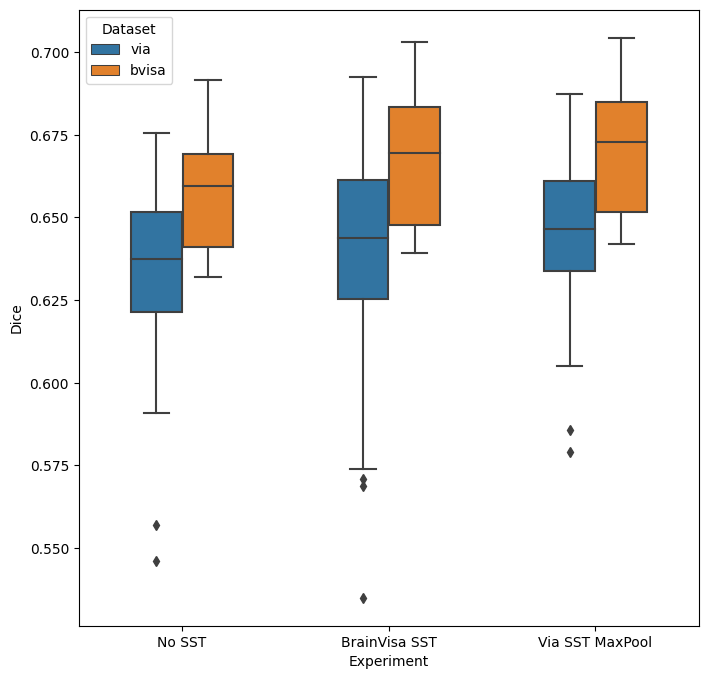

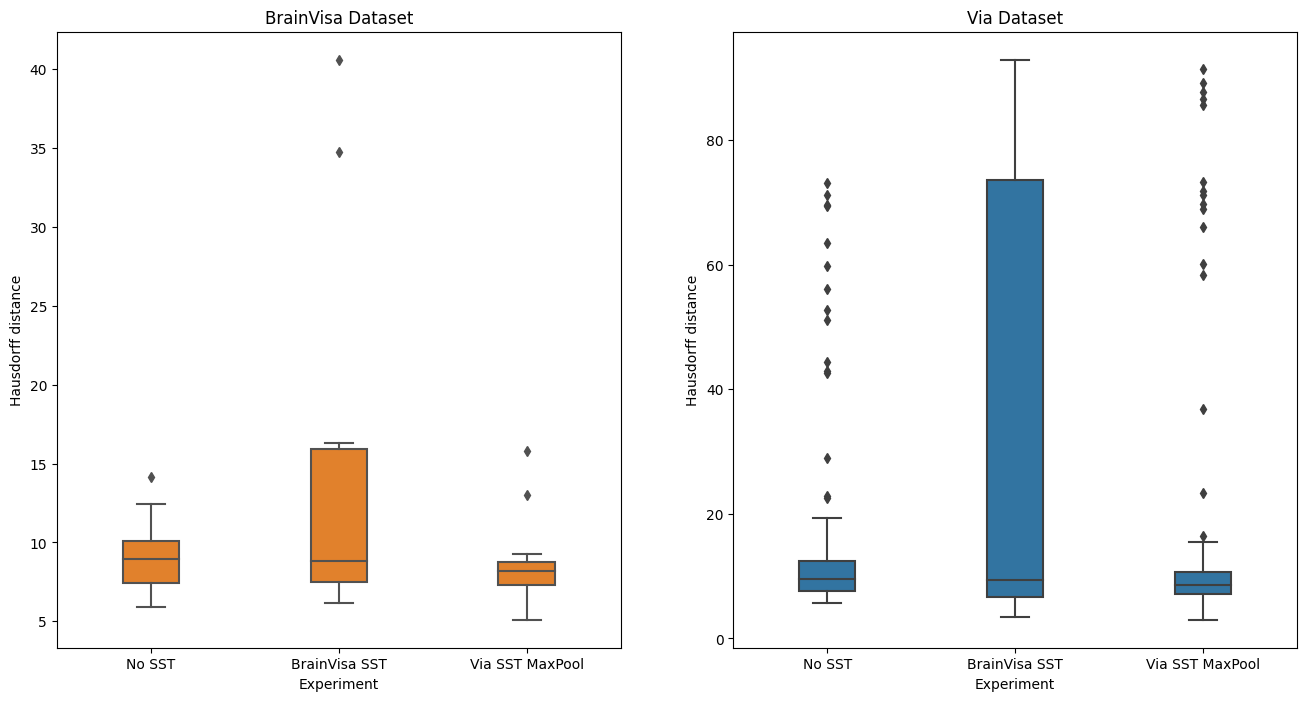

In [8]:
filter_ds = None #'via'
experiments2select = ['CS1x_noSST_tverskyLoss_monaBasicUnet-fullTraining',
                      'CS1x_bvisaSST_tverskyLoss_monaBasicUnet-fullFinetune',
                      'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-fullFinetune-MaxPool',
                     ]
experiments2rename = {'CS1x_noSST_tverskyLoss_monaBasicUnet-fullTraining':'No SST',
                      'CS1x_bvisaSST_tverskyLoss_monaBasicUnet-fullFinetune':'BrainVisa SST',
                      'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-fullFinetune-MaxPool':'Via SST MaxPool',
                     }
if experiments2select:
    plot_df = merged_dfs[merged_dfs['Experiment'].isin(experiments2select)]
if experiments2rename:
    plot_df = plot_df.replace({'Experiment':experiments2rename})

if filter_ds:
    plot_df = plot_df[plot_df['Dataset'] == filter_ds]
else:
    plot_df = plot_df

fig = plt.figure(figsize=(8, 8))
sns.boxplot(data=plot_df, hue='Dataset', y='Dice', x='Experiment',
            width =0.5)
plt.xticks(rotation=0)
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
plot_df1 = plot_df[plot_df.Dataset == 'via']
plot_df2 = plot_df[plot_df.Dataset == 'bvisa']
plt.xticks(rotation=0)
sns.boxplot(data=plot_df2, 
            y='Hausdorff distance', x='Experiment',width=0.3,
            ax = ax[0], color=sns.palettes.color_palette('tab10')[1])
sns.boxplot(data=plot_df1,
            y='Hausdorff distance', x='Experiment', width=0.3,
            ax = ax[1],  color=sns.palettes.color_palette('tab10')[0])
ax[0].set_title('BrainVisa Dataset')
ax[1].set_title('Via Dataset')
plt.show()

In [9]:
aggregate_results[aggregate_results.exp.isin(experiments2select)]

,exp,dataset,dice,hausdorff,table
2,CS1x_noSST_tverskyLoss_monaBasicUnet-fullTraining,via,0.6354+-0.0228,15.7147+-16.3725,dice iou hausdorff_dist...
3,CS1x_bvisaSST_tverskyLoss_monaBasicUnet-fullFi...,via,0.6399+-0.0296,28.7512+-32.2332,dice iou hausdorff_dist...
4,CS1x_via11simBVISASST_tverskyLoss_monaBasicUne...,via,0.6462+-0.0214,17.4486+-22.9309,dice iou hausdorff_dist...
17,CS1x_noSST_tverskyLoss_monaBasicUnet-fullTraining,bvisa,0.6578+-0.0185,9.1776+-2.3141,dice iou hausdorff_distan...
18,CS1x_bvisaSST_tverskyLoss_monaBasicUnet-fullFi...,bvisa,0.6687+-0.0216,14.4016+-10.9854,dice iou hausdorff_distan...
19,CS1x_via11simBVISASST_tverskyLoss_monaBasicUne...,bvisa,0.6714+-0.0206,8.7691+-2.8022,dice iou hausdorff_distan...


In [10]:
merged_dfs

,Dice,iou,Hausdorff distance,Experiment,Dataset
caseid,,,,,
sub-via052,0.668216,0.501745,53.823787,CS1x_noSST_noSynthAugm_monaiUnet,via
sub-via085,0.689161,0.525740,81.939002,CS1x_noSST_noSynthAugm_monaiUnet,via
sub-via118,0.703360,0.542448,8.306624,CS1x_noSST_noSynthAugm_monaiUnet,via
sub-via126,0.697913,0.535995,38.742741,CS1x_noSST_noSynthAugm_monaiUnet,via
sub-via151,0.708252,0.548290,7.071068,CS1x_noSST_noSynthAugm_monaiUnet,via
...,...,...,...,...,...
shiva,0.491803,0.326087,7.681146,CS2x_bvisaSST_monaiUnet-fullFinetune,bvisa
sujet04,0.483871,0.319149,8.774964,CS2x_bvisaSST_monaiUnet-fullFinetune,bvisa
sujet05,0.446927,0.287770,8.485281,CS2x_bvisaSST_monaiUnet-fullFinetune,bvisa


# Plots 3: SimpleSST VIA-BVISA Results Frozen Encoder

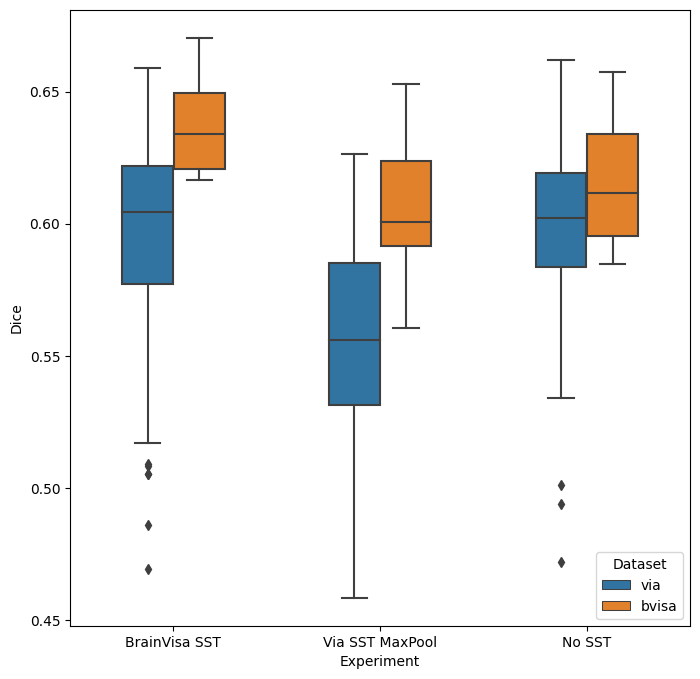

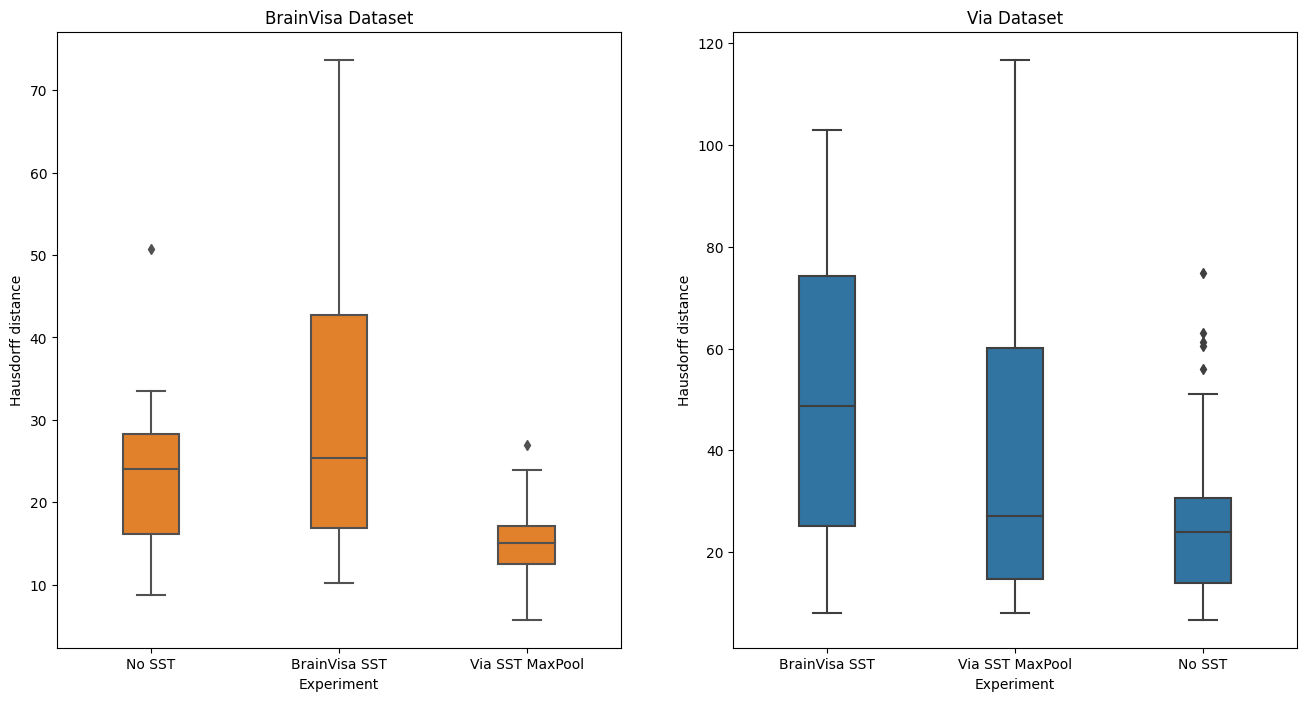

In [11]:
filter_ds = None #'via'
experiments2select = ['CS1x_noSST_tverskyLoss_monaBasicUnet-frozenEncoder',
                      'CS1x_bvisaSST_tverskyLoss_monaBasicUnet-frozenEncoder',
                      'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-frozenEncoder-MaxPool']
experiments2rename = {'CS1x_noSST_tverskyLoss_monaBasicUnet-frozenEncoder':'No SST',
                      'CS1x_bvisaSST_tverskyLoss_monaBasicUnet-frozenEncoder':'BrainVisa SST',
                      'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-frozenEncoder-MaxPool':'Via SST MaxPool'}
if experiments2select:
    plot_df = merged_dfs[merged_dfs['Experiment'].isin(experiments2select)]
if experiments2rename:
    plot_df = plot_df.replace({'Experiment':experiments2rename})

if filter_ds:
    plot_df = plot_df[plot_df['Dataset'] == filter_ds]
else:
    plot_df = plot_df

fig = plt.figure(figsize=(8, 8))
sns.boxplot(data=plot_df, hue='Dataset', y='Dice', x='Experiment',
            width =0.5)
plt.xticks(rotation=0)
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
plot_df1 = plot_df[plot_df.Dataset == 'via']
plot_df2 = plot_df[plot_df.Dataset == 'bvisa']
plt.xticks(rotation=0)
sns.boxplot(data=plot_df2, 
            y='Hausdorff distance', x='Experiment',width=0.3,
            ax = ax[0], color=sns.palettes.color_palette('tab10')[1])
sns.boxplot(data=plot_df1,
            y='Hausdorff distance', x='Experiment', width=0.3,
            ax = ax[1],  color=sns.palettes.color_palette('tab10')[0])
ax[0].set_title('BrainVisa Dataset')
ax[1].set_title('Via Dataset')
plt.show()

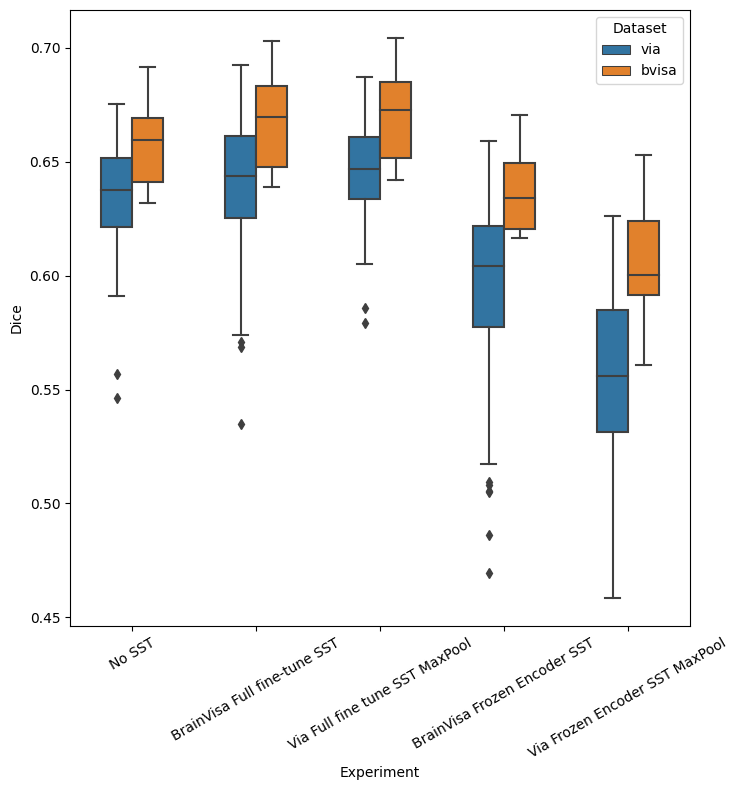

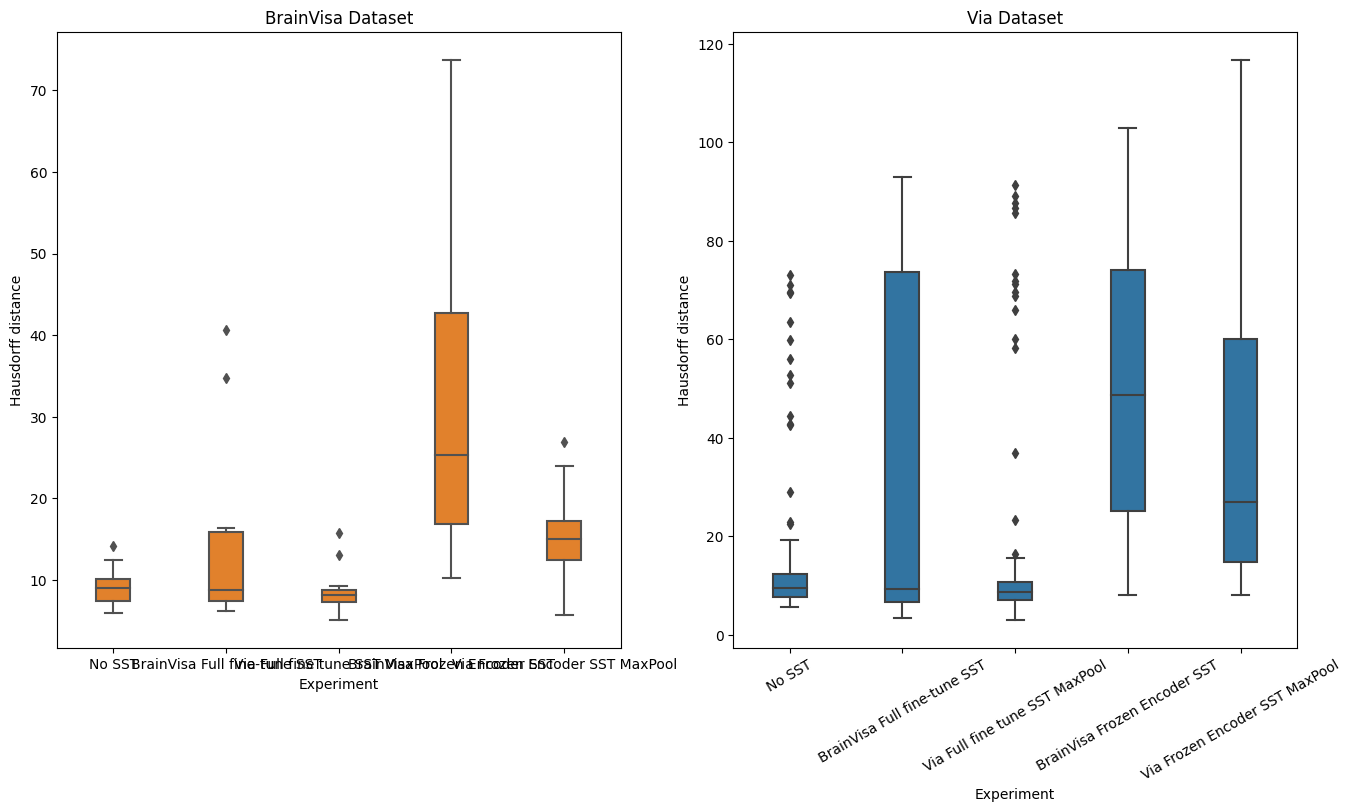

In [12]:
filter_ds = None #'via'
# experiments2select = ['CS1x_noSST_tverskyLoss_monaBasicUnet-frozenEncoder',
#                       'CS1x_bvisaSST_tverskyLoss_monaBasicUnet-frozenEncoder',
#                       'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-frozenEncoder-MaxPool']
# experiments2rename = {'CS1x_noSST_tverskyLoss_monaBasicUnet-frozenEncoder':'No SST',
#                       'CS1x_bvisaSST_tverskyLoss_monaBasicUnet-frozenEncoder':'BrainVisa SST',
#                       'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-frozenEncoder-MaxPool':'Via SST MaxPool'}

experiments2select = ['CS1x_noSST_tverskyLoss_monaBasicUnet-fullTraining',
                      'CS1x_bvisaSST_tverskyLoss_monaBasicUnet-fullFinetune',
                      'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-fullFinetune-MaxPool',
                      'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-frozenEncoder-MaxPool',
                      'CS1x_bvisaSST_tverskyLoss_monaBasicUnet-frozenEncoder',

]

                     
experiments2rename = {'CS1x_noSST_tverskyLoss_monaBasicUnet-fullTraining':'No SST',
                      'CS1x_bvisaSST_tverskyLoss_monaBasicUnet-fullFinetune':'BrainVisa Full fine-tune SST',
                      'CS1x_bvisaSST_tverskyLoss_monaBasicUnet-frozenEncoder':'BrainVisa Frozen Encoder SST',
                      'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-fullFinetune-MaxPool':'Via Full fine tune SST MaxPool',
                      'CS1x_via11simBVISASST_tverskyLoss_monaBasicUnet-frozenEncoder-MaxPool':'Via Frozen Encoder SST MaxPool',
                     }


if experiments2select:
    plot_df = merged_dfs[merged_dfs['Experiment'].isin(experiments2select)]
if experiments2rename:
    plot_df = plot_df.replace({'Experiment':experiments2rename})

if filter_ds:
    plot_df = plot_df[plot_df['Dataset'] == filter_ds]
else:
    plot_df = plot_df

fig = plt.figure(figsize=(8, 8))
sns.boxplot(data=plot_df, hue='Dataset', y='Dice', x='Experiment',
            width =0.5)
plt.xticks(rotation=30)
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
plot_df1 = plot_df[plot_df.Dataset == 'via']
plot_df2 = plot_df[plot_df.Dataset == 'bvisa']
plt.xticks(rotation=30)
sns.boxplot(data=plot_df2, 
            y='Hausdorff distance', x='Experiment',width=0.3,
            ax = ax[0], color=sns.palettes.color_palette('tab10')[1])
plt.xticks(rotation=30)

sns.boxplot(data=plot_df1,
            y='Hausdorff distance', x='Experiment', width=0.3,
            ax = ax[1],  color=sns.palettes.color_palette('tab10')[0])
ax[0].set_title('BrainVisa Dataset')
ax[1].set_title('Via Dataset')
plt.show()

# Plots 4: Segment-SST

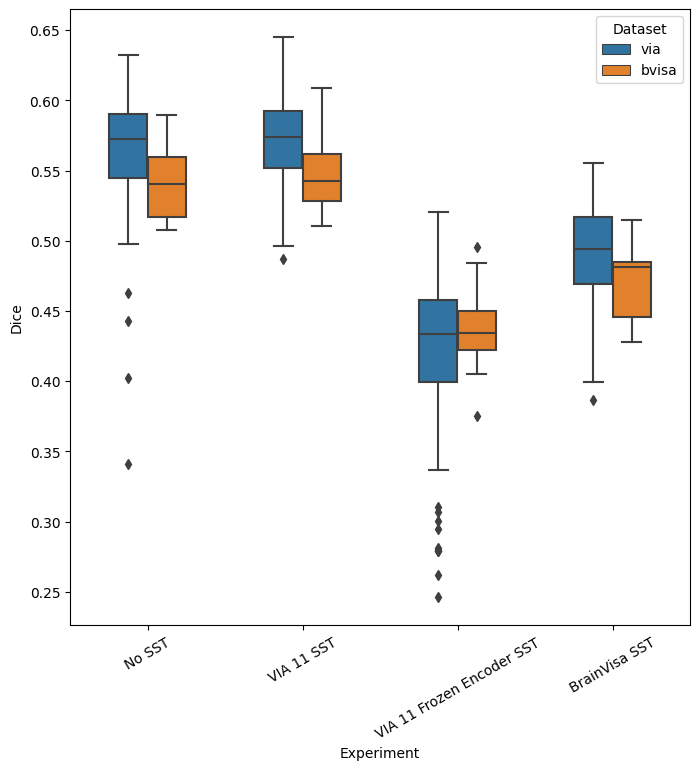

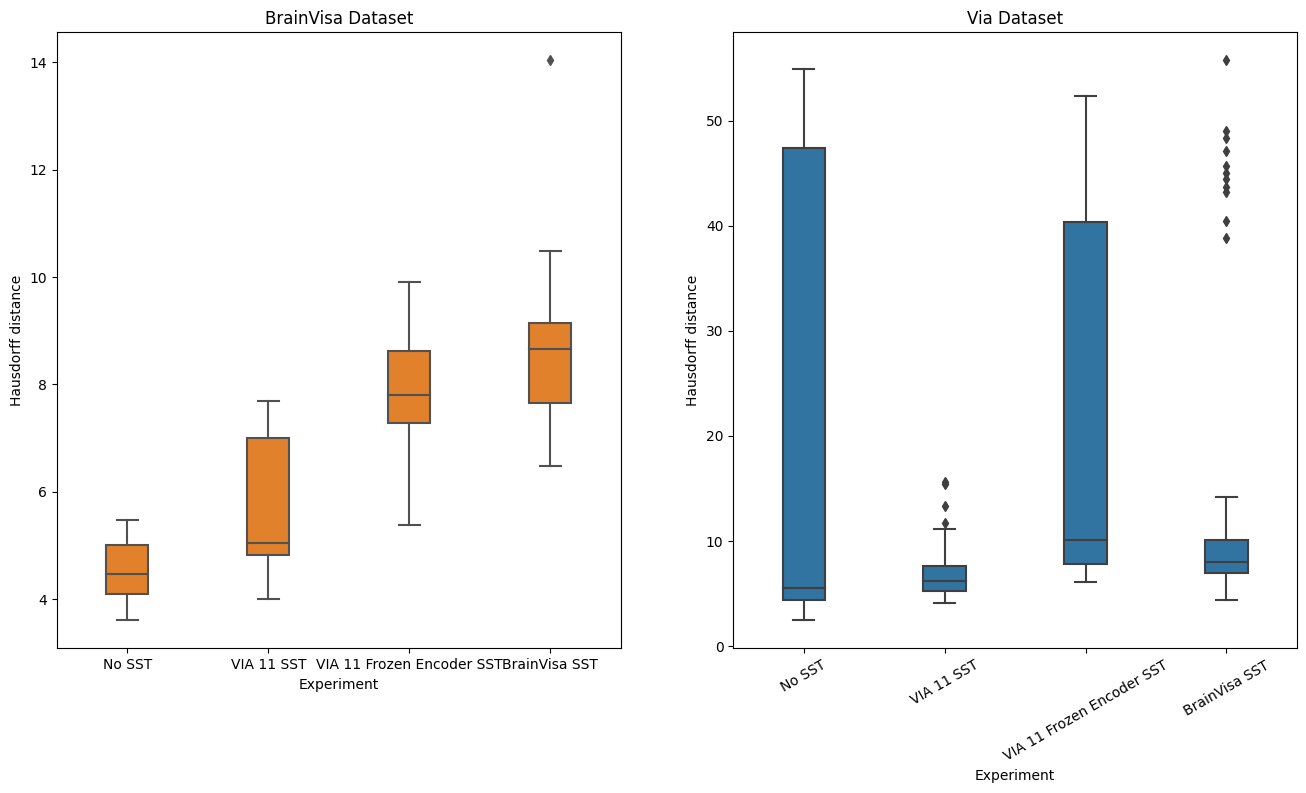

In [13]:

experiments2select = ['CS2x_via11SegmSST_monaiUnet-fullFinetune',
                    #   'CS2x_via11SegmSST_monaiUnet-frozenEncoder',
                      'CS2x_noSST_monaiUnet-fullFinetune',
                      'CS2x_bvisaSST_monaiUnet-fullFinetune',
                      'CS2x_via11SegmSST_monaiUnet-frozenEncoder']  
                     
experiments2rename = {'CS2x_via11SegmSST_monaiUnet-fullFinetune': 'VIA 11 SST',
                      'CS2x_noSST_monaiUnet-fullFinetune': 'No SST',
                      'CS2x_bvisaSST_monaiUnet-fullFinetune':'BrainVisa SST',
                       'CS2x_via11SegmSST_monaiUnet-frozenEncoder':'VIA 11 Frozen Encoder SST',}


if experiments2select:
    plot_df = merged_dfs[merged_dfs['Experiment'].isin(experiments2select)]
if experiments2rename:
    plot_df = plot_df.replace({'Experiment':experiments2rename})

if filter_ds:
    plot_df = plot_df[plot_df['Dataset'] == filter_ds]
else:
    plot_df = plot_df

fig = plt.figure(figsize=(8, 8))
sns.boxplot(data=plot_df, hue='Dataset', y='Dice', x='Experiment',
            width =0.5)
plt.xticks(rotation=30)
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
plot_df1 = plot_df[plot_df.Dataset == 'via']
plot_df2 = plot_df[plot_df.Dataset == 'bvisa']
plt.xticks(rotation=30)
sns.boxplot(data=plot_df2, 
            y='Hausdorff distance', x='Experiment',width=0.3,
            ax = ax[0], color=sns.palettes.color_palette('tab10')[1])
plt.xticks(rotation=30)

sns.boxplot(data=plot_df1,
            y='Hausdorff distance', x='Experiment', width=0.3,
            ax = ax[1],  color=sns.palettes.color_palette('tab10')[0])
ax[0].set_title('BrainVisa Dataset')
ax[1].set_title('Via Dataset')
plt.show()

In [14]:
aggregate_results[aggregate_results.exp.isin(experiments2select)]

,exp,dataset,dice,hausdorff,table
10,CS2x_noSST_monaiUnet-fullFinetune,via,0.5622+-0.0437,17.5154+-20.4330,dice iou hausdorff_dist...
12,CS2x_via11SegmSST_monaiUnet-fullFinetune,via,0.5699+-0.0306,6.7163+-2.1130,dice iou hausdorff_dist...
13,CS2x_via11SegmSST_monaiUnet-frozenEncoder,via,0.4223+-0.0594,20.3778+-16.3908,dice iou hausdorff_dist...
14,CS2x_bvisaSST_monaiUnet-fullFinetune,via,0.4901+-0.0357,12.1818+-11.9466,dice iou hausdorff_dist...
25,CS2x_noSST_monaiUnet-fullFinetune,bvisa,0.5408+-0.0257,4.5108+-0.5651,dice iou hausdorff_distan...
26,CS2x_via11SegmSST_monaiUnet-fullFinetune,bvisa,0.5464+-0.0264,5.6262+-1.2634,dice iou hausdorff_distan...
27,CS2x_via11SegmSST_monaiUnet-frozenEncoder,bvisa,0.4369+-0.0322,7.8018+-1.1398,dice iou hausdorff_distan...
28,CS2x_bvisaSST_monaiUnet-fullFinetune,bvisa,0.4703+-0.0252,8.8257+-1.8993,dice iou hausdorff_distan...
